### Business Understanding

Neste desafio você deve identificar qual loja da rede Alura Store vender para iniciar um novo empreendimento. Para isso, você analisará dados de vendas, desempenho e avaliações das 4 lojas fictícias da Alura Store. O objetivo é identificar a loja com menor eficiência e apresentar uma recomendação final baseada nos dados.

### Importando os pacotes necessários

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FuncFormatter

In [2]:
# Carregando os dados e atribuindo uma variável

loja1 = pd.read_csv('/content/loja_1.csv')
loja2 = pd.read_csv('/content/loja_2.csv')
loja3 = pd.read_csv('/content/loja_3.csv')
loja4 = pd.read_csv('/content/loja_4.csv')

## Análise Exploratória de Dados (EDA)

Essa seção fornece uma visão detalhada da estrutura e do siginificado dos dados que serão analisados.



## Lojas

Explorando os datasets de cada uma das lojas. As tabelas das lojas possuem a mesma estrutura.

In [3]:
# Ver entradas do dataset loja 1

loja1


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Celular Plus X42,eletronicos,1712.54,88.772042,15/11/2021,Thiago Silva,RJ,1,boleto,1,-22.25,-42.66
2355,Impressora,eletronicos,377.02,20.363958,18/03/2023,Lucas Oliveira,SP,5,boleto,1,-22.19,-48.79
2356,Jogo de tabuleiro,brinquedos,163.82,9.611337,06/07/2021,Lucas Oliveira,PR,5,cartao_credito,4,-24.89,-51.55
2357,Cama box,moveis,921.77,46.665919,02/05/2022,Pedro Gomes,RN,1,cartao_credito,2,-5.81,-36.59


In [4]:
# Ver nome das colunas, contagem de linhas e colunas e tipos de dados do dataset
loja1.info()

# total de linhas e colunas

print(f' A Loja 1 possui: {loja1.shape[0]} entradas e {loja1.shape[1]} colunas')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
 A Loja 1 possui: 2359 entradas e 12 colunas


In [5]:
# Ver entradas do dataset loja 2

loja2

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Cadeira de escritório,moveis,378.20,20.421138,04/08/2021,Thiago Silva,MG,1,boleto,1,-18.10,-44.38
1,Pandeiro,instrumentos musicais,102.37,3.035334,26/11/2020,Bianca Santos,RJ,3,cartao_credito,4,-22.25,-42.66
2,Cama king,moveis,591.13,31.759020,22/10/2021,Thiago Silva,SC,5,cartao_credito,10,-27.45,-50.95
3,Cama king,moveis,1208.24,61.919584,04/05/2022,Larissa Alves,RS,5,cartao_credito,10,-30.17,-53.50
4,Cadeira de escritório,moveis,530.41,25.827176,26/02/2022,Lucas Oliveira,SP,4,cartao_credito,3,-22.19,-48.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Jogo de panelas,utilidades domesticas,187.01,10.846135,04/12/2022,Bruno Rodrigues,BA,5,cartao_credito,2,-13.29,-41.71
2355,Lavadora de roupas,eletrodomesticos,1626.85,86.907994,09/02/2020,Isabella Pereira,SP,4,cartao_credito,5,-22.19,-48.79
2356,Micro-ondas,eletrodomesticos,1063.85,57.177917,27/09/2022,Bianca Santos,SP,5,boleto,1,-22.19,-48.79
2357,Celular Plus X42,eletronicos,2965.72,155.500107,21/04/2022,João Souza,RJ,5,cartao_credito,2,-22.25,-42.66


In [6]:
# Ver nome das colunas, contagem de linhas e colunas e tipos de dados do dataset
loja2.info()

# total de linhas e colunas

print(f' A Loja 2 possui: {loja2.shape[0]} entradas e {loja2.shape[1]} colunas')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
 A Loja 2 possui: 2359 entradas e 12 colunas


In [7]:
# Ver primeiras entradas do dataset loja 3

loja3

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Secadora de roupas,eletrodomesticos,1713.50,88.823159,17/12/2021,Camila Ribeiro,CE,4,cartao_credito,4,-5.20,-39.53
1,Cômoda,moveis,386.81,18.180908,10/02/2021,Larissa Alves,RS,3,cartao_credito,1,-30.17,-53.50
2,Violão,instrumentos musicais,404.62,23.197592,22/01/2023,Lucas Oliveira,SP,5,cartao_credito,3,-22.19,-48.79
3,Bola de vôlei,esporte e lazer,78.40,4.463341,22/03/2022,Pedro Gomes,BA,4,cartao_credito,6,-13.29,-41.71
4,Guarda roupas,moveis,694.76,34.578319,12/01/2022,Bianca Santos,SP,1,cartao_credito,1,-22.19,-48.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Dashboards com Power BI,livros,35.61,2.835973,21/10/2022,Bruno Rodrigues,SP,5,cartao_credito,1,-22.19,-48.79
2355,Dashboards com Power BI,livros,42.38,2.943620,23/06/2022,Bianca Santos,SC,5,cartao_credito,1,-27.45,-50.95
2356,Cadeira de escritório,moveis,636.10,34.159188,19/02/2023,Camila Ribeiro,DF,5,cartao_credito,3,-15.83,-47.86
2357,Mesa de centro,moveis,164.15,6.324933,19/09/2021,Bianca Santos,SP,4,cartao_credito,8,-22.19,-48.79


In [8]:
# Ver nome das colunas, contagem de linhas e colunas e tipos de dados do dataset
loja3.info()

# total de linhas e colunas

print(f' A Loja 3 possui: {loja3.shape[0]} entradas e {loja3.shape[1]} colunas')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
 A Loja 3 possui: 2359 entradas e 12 colunas


In [9]:
# Ver entradas do dataset loja 4

loja4

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2353,Mesa de jantar,moveis,303.60,16.852799,12/02/2020,Camila Ribeiro,RJ,5,cartao_credito,1,-22.25,-42.66
2354,Cadeira de escritório,moveis,456.02,24.812798,17/05/2022,Felipe Santos,PE,5,cartao_credito,3,-8.38,-37.86
2355,Copo térmico,esporte e lazer,48.99,3.139675,03/05/2022,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79
2356,Jogo de panelas,utilidades domesticas,202.45,11.062979,15/06/2020,Bianca Santos,PR,5,cartao_credito,1,-24.89,-51.55


In [10]:
# Ver nome das colunas, contagem de linhas e colunas e tipos de dados do dataset
loja4.info()

# total de linhas e colunas

print(f' A Loja 4 possui: {loja4.shape[0]} entradas e {loja4.shape[1]} colunas')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2358 non-null   object 
 1   Categoria do Produto    2358 non-null   object 
 2   Preço                   2358 non-null   float64
 3   Frete                   2358 non-null   float64
 4   Data da Compra          2358 non-null   object 
 5   Vendedor                2358 non-null   object 
 6   Local da compra         2358 non-null   object 
 7   Avaliação da compra     2358 non-null   int64  
 8   Tipo de pagamento       2358 non-null   object 
 9   Quantidade de parcelas  2358 non-null   int64  
 10  lat                     2358 non-null   float64
 11  lon                     2358 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.2+ KB
 A Loja 4 possui: 2358 entradas e 12 colunas


### Temos dados nulos nos datasets?


In [11]:
# verificar a existência de dados nulos na tabela loja 1

loja1.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


* Não há dados nulos no dataset loja 1

In [12]:
# verificar a existência de dados nulos na tabela loja 2

loja2.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


* Não há dados nulos no dataset loja 2

In [13]:
# verificar a existência de dados nulos na tabela loja 3

loja3.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


* Não há dados nulos no dataset loja 3

In [14]:
# verificar a existência de dados nulos na tabela loja 4

loja4.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


* Não há dados nulos no dataset loja 4

### Temos duplicados na nossa tabela?

In [15]:
# Verificar se há dados duplicados na tabela loja 1

loja1.duplicated().sum()

np.int64(0)

* Não há dados duplicados na loja 1

In [16]:
# Verificar se há dados duplicados na tabela loja 2

loja2.duplicated().sum()

np.int64(0)

* Não há dados duplicados na loja 2

In [17]:
# Verificar se há dados duplicados na tabela loja 3

loja3.duplicated().sum()

np.int64(0)

* Não há dados duplicados na loja 3

In [18]:
# Verificar se há dados duplicados na tabela loja 4

loja4.duplicated().sum()

np.int64(0)

* Não há dados duplicados na loja 4

### Tratamento da coluna 'data da compra' do tipo object para date

In [19]:
# Convertendo a coluna 'Data da Compra' para o tipo datetime - loja 1

loja1['Data da Compra'] = pd.to_datetime(loja1['Data da Compra'])

# Verificando alteração de tipo da coluna 'Data da compra' para datetime

loja1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Produto                 2359 non-null   object        
 1   Categoria do Produto    2359 non-null   object        
 2   Preço                   2359 non-null   float64       
 3   Frete                   2359 non-null   float64       
 4   Data da Compra          2359 non-null   datetime64[ns]
 5   Vendedor                2359 non-null   object        
 6   Local da compra         2359 non-null   object        
 7   Avaliação da compra     2359 non-null   int64         
 8   Tipo de pagamento       2359 non-null   object        
 9   Quantidade de parcelas  2359 non-null   int64         
 10  lat                     2359 non-null   float64       
 11  lon                     2359 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), obje

<ipython-input-19-574d432ba04a>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  loja1['Data da Compra'] = pd.to_datetime(loja1['Data da Compra'])


In [20]:
# Convertendo a coluna 'Data da Compra' para o tipo datetime - loja 2

loja2['Data da Compra'] = pd.to_datetime(loja2['Data da Compra'], dayfirst=True)

# Verificando alteração de tipo da coluna 'Data da compra' para datetime

loja2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Produto                 2359 non-null   object        
 1   Categoria do Produto    2359 non-null   object        
 2   Preço                   2359 non-null   float64       
 3   Frete                   2359 non-null   float64       
 4   Data da Compra          2359 non-null   datetime64[ns]
 5   Vendedor                2359 non-null   object        
 6   Local da compra         2359 non-null   object        
 7   Avaliação da compra     2359 non-null   int64         
 8   Tipo de pagamento       2359 non-null   object        
 9   Quantidade de parcelas  2359 non-null   int64         
 10  lat                     2359 non-null   float64       
 11  lon                     2359 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), obje

In [21]:
# Convertendo a coluna 'Data da Compra' para o tipo datetime - loja 3

loja3['Data da Compra'] = pd.to_datetime(loja3['Data da Compra'], dayfirst=True)

# Verificando alteração de tipo da coluna 'Data da compra' para datetime

loja3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Produto                 2359 non-null   object        
 1   Categoria do Produto    2359 non-null   object        
 2   Preço                   2359 non-null   float64       
 3   Frete                   2359 non-null   float64       
 4   Data da Compra          2359 non-null   datetime64[ns]
 5   Vendedor                2359 non-null   object        
 6   Local da compra         2359 non-null   object        
 7   Avaliação da compra     2359 non-null   int64         
 8   Tipo de pagamento       2359 non-null   object        
 9   Quantidade de parcelas  2359 non-null   int64         
 10  lat                     2359 non-null   float64       
 11  lon                     2359 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), obje

In [22]:
# Convertendo a coluna 'Data da Compra' para o tipo datetime - loja 4

loja4['Data da Compra'] = pd.to_datetime(loja4['Data da Compra'], dayfirst=True)

# Verificando alteração de tipo da coluna 'Data da compra' para datetime

loja4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Produto                 2358 non-null   object        
 1   Categoria do Produto    2358 non-null   object        
 2   Preço                   2358 non-null   float64       
 3   Frete                   2358 non-null   float64       
 4   Data da Compra          2358 non-null   datetime64[ns]
 5   Vendedor                2358 non-null   object        
 6   Local da compra         2358 non-null   object        
 7   Avaliação da compra     2358 non-null   int64         
 8   Tipo de pagamento       2358 non-null   object        
 9   Quantidade de parcelas  2358 non-null   int64         
 10  lat                     2358 non-null   float64       
 11  lon                     2358 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), obje

## Análise de faturamento


In [23]:
# soma total de vendas lojas

# Faturamento loja 1

loja1['Preço'].sum()


np.float64(1534509.12)

### Unindo datasets

Farei a uniao das tabelas para seguir com a análise e comparação entre as lojas

In [24]:
# Adicionar uma coluna identificando a loja

loja1['Loja'] = "Loja 1"
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

In [25]:
# Unir todos os DataFrames em um só

todas_lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

In [26]:
# Criar coluna de Ano da Compra

todas_lojas["Ano"] = todas_lojas["Data da Compra"].dt.year

In [27]:
# Calcular o Faturamento

todas_lojas["Faturamento"] = todas_lojas["Preço"]

* Optei por não incluir o frete no cálculo do faturamento visto que não foi informado se este é realmente pago pelo cliente neste caso.

In [28]:
# Faturamento total por loja

faturamento_total_por_loja = todas_lojas.groupby('Loja')["Faturamento"].sum().reset_index()

In [29]:
faturamento_total_por_loja

,Loja,Faturamento
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


In [30]:
# Faturamento por ano e por loja

faturamento_ano_loja = todas_lojas.groupby(['Loja', 'Ano'])['Faturamento'].sum().reset_index()

In [31]:
faturamento_ano_loja

,Loja,Ano,Faturamento
0,Loja 1,2020,491911.51
1,Loja 1,2021,482829.91
2,Loja 1,2022,422086.24
3,Loja 1,2023,137681.46
4,Loja 2,2020,427288.25
5,Loja 2,2021,468288.89
6,Loja 2,2022,477635.56
7,Loja 2,2023,115246.36
8,Loja 3,2020,428943.09
9,Loja 3,2021,483938.91


### Visualização de dados

<ipython-input-32-3906e89adf64>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=faturamento_total_por_loja, x="Loja", y="Faturamento", palette="pastel")


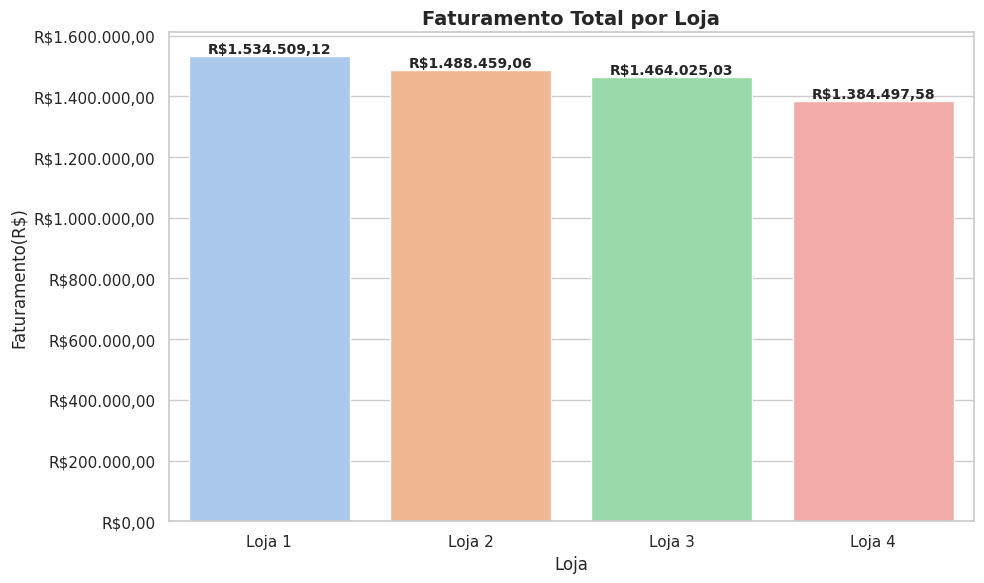

In [32]:
from matplotlib.ticker import FuncFormatter

# Formata valores como moeda brasileira
def formatar_moeda(x, _):
    return f'R${x:,.2f}'.replace(",", "v").replace(".", ",").replace("v", ".")

# Define o estilo do seaborn
sns.set(style="whitegrid")

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=faturamento_total_por_loja, x="Loja", y="Faturamento", palette="pastel")

# Aplica o formato de moeda ao eixo Y
ax.yaxis.set_major_formatter(FuncFormatter(formatar_moeda))

# Adiciona os valores acima de cada barra
for p in ax.patches:
    valor = p.get_height()
    ax.annotate(
        formatar_moeda(valor, None),
        (p.get_x() + p.get_width() / 2, valor),
        ha='center', va='bottom',
        fontsize=10, fontweight='bold'
    )

plt.title("Faturamento Total por Loja", fontsize=14, fontweight='bold')
plt.xlabel("Loja")
plt.ylabel("Faturamento(R$)")
plt.tight_layout()
plt.show()

É possível observar que a loja com maior faturamento é a loja 1 e a loja com menor faturamento é a 4 com uma diferença entre essas lojas de R$150.011,54

<ipython-input-33-fbcf329e7798>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


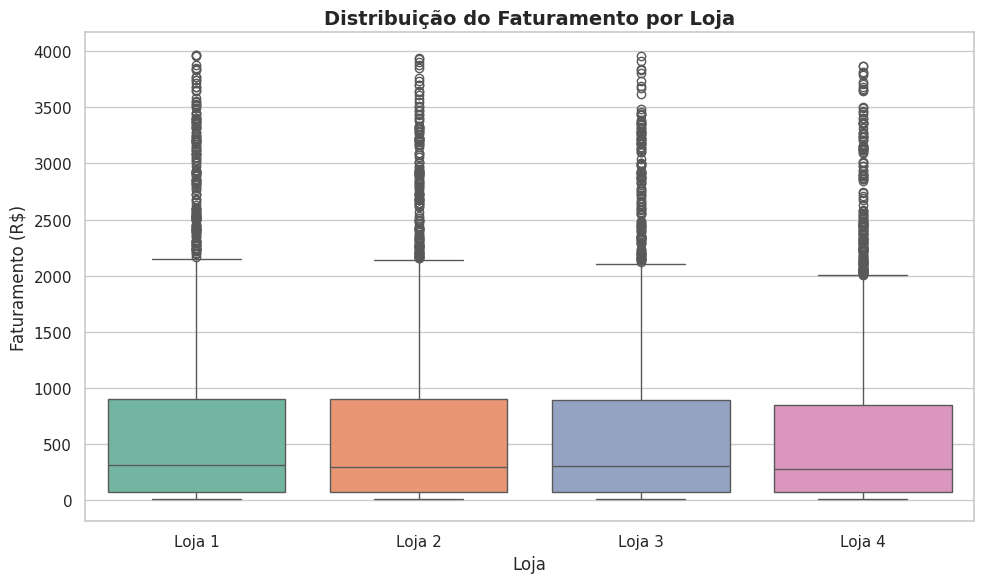

In [33]:
# Boxplot de distribuição de faturamento

# Estilo visual mais limpo
sns.set(style="whitegrid")

# Tamanho da figura
plt.figure(figsize=(10, 6))

# Criando o boxplot
ax = sns.boxplot(
    data=todas_lojas,
    x="Loja",
    y="Faturamento",
    palette="Set2"
)

# Título e eixos
plt.title("Distribuição do Faturamento por Loja", fontsize=14, fontweight='bold')
plt.xlabel("Loja")
plt.ylabel("Faturamento (R$)")
plt.tight_layout()
plt.show()


O boxplot ajuda a visualizar a distribuição do faturamento total de cada uma das 4 lojas e compará-los. Como é possível de observar, a distribuição é bem semelhante em todas as lojas(com valores de mediana, quartis e outliers superiores parecidos), ou seja, vamos analisar outras variaveis para tentar identificar diferenças.

In [34]:
# Extraindo mês e ano

todas_lojas["Ano"] = todas_lojas["Data da Compra"].dt.year
todas_lojas["Mês"] = todas_lojas["Data da Compra"].dt.month

In [35]:
# Agrupar por Loja, Ano e Mês

faturamento_mensal = (
    todas_lojas.groupby(["Loja", "Ano", "Mês"])["Faturamento"]
    .sum()
    .reset_index()
)

In [36]:
# Tabela de faturamento mensal
faturamento_mensal

,Loja,Ano,Mês,Faturamento
0,Loja 1,2020,1,44112.70
1,Loja 1,2020,2,53405.54
2,Loja 1,2020,3,42083.02
3,Loja 1,2020,4,44888.34
4,Loja 1,2020,5,51443.80
...,...,...,...,...
151,Loja 4,2022,11,38134.08
152,Loja 4,2022,12,25525.22
153,Loja 4,2023,1,26395.79
154,Loja 4,2023,2,26203.51


In [37]:
faturamento_pivot = faturamento_mensal.pivot_table(
    index=["Ano", "Mês"],
    columns="Loja",
    values="Faturamento"
).fillna(0)

In [38]:
# Faturamento mês a mês e ano por loja

faturamento_pivot

Loja        Loja 1    Loja 2    Loja 3    Loja 4
Ano  Mês                                        
2020 1    44112.70  41505.53  31710.54  25731.91
     2    53405.54  23184.97  36769.81  30507.49
     3    42083.02  40687.92  40033.19  38044.35
     4    44888.34  36862.31  47124.45  52656.70
     5    51443.80  33949.42  34831.23  42654.91
     6    35062.24  34741.62  23285.27  35804.36
     7    46780.66  31396.39  44803.33  35899.68
     8    41501.80  31297.17  34500.91  41609.71
     9    40324.79  41504.69  35557.90  37599.74
     10   28179.04  44358.25  24742.78  23596.86
     11   26492.66  30091.38  30491.17  46987.55
     12   37636.92  37708.60  45092.51  30036.26
2021 1    34071.89  38884.52  30216.08  31367.18
     2    43490.29  36392.43  27014.34  41330.34
     3    39131.38  32862.15  37293.78  50615.36
     4    30182.93  43971.77  33055.54  53593.85
     5    37069.48  37162.57  35324.50  27172.00
     6    41080.84  30432.75  42871.71  22543.46
     7    49170.72  46154.89  35457.94  46549.78
     8    46494.11  42206.23  46484.54  34492.54
     9    59428.15  40394.15  18818.06  41887.51
     10   36714.49  32344.25  48438.63  36103.61
     11   34895.53  38690.29  65442.45  36450.60
     12   31100.10  48792.89  63521.34  41657.04
2022 1    34977.73  54225.10  54357.68  45747.49
     2    37066.49  31138.05  32829.95  43258.23
     3    33822.37  31492.74  31856.46  41515.70
     4    29845.00  46150.34  37819.09  27652.58
     5    33463.87  46300.82  42567.62  28014.04
     6    33313.04  31665.37  33864.18  30109.26
     7    36334.79  31502.84  40976.28  19827.46
     8    37061.35  38903.79  37062.62  35734.09
     9    49481.04  43742.34  39136.70  41315.44
     10   19576.04  40580.65  37206.44  26127.64
     11   31541.95  37452.91  39951.73  38134.08
     12   45602.57  44480.61  39621.95  25525.22
2023 1    38573.59  33534.07  29931.91  26395.79
     2    49637.18  45558.08  23670.30  26203.51
     3    49470.69  36154.21  30290.12  24044.26

### Vendas por categoria

In [39]:
vendas_categoria_geral = (
    todas_lojas.groupby("Categoria do Produto")["Faturamento"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Visualizando
vendas_categoria_geral


,Categoria do Produto,Faturamento
0,eletronicos,2214099.72
1,eletrodomesticos,1766337.03
2,moveis,1010214.00
3,instrumentos musicais,465029.67
4,esporte e lazer,190635.39
5,brinquedos,98140.86
6,utilidades domesticas,76773.38
7,livros,50260.74


A categoria de eletronicos foi a que apresentou o maior faturamento geral, seguida de eletrodomesticos e moveis.

<ipython-input-40-c59dc81ebd4b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


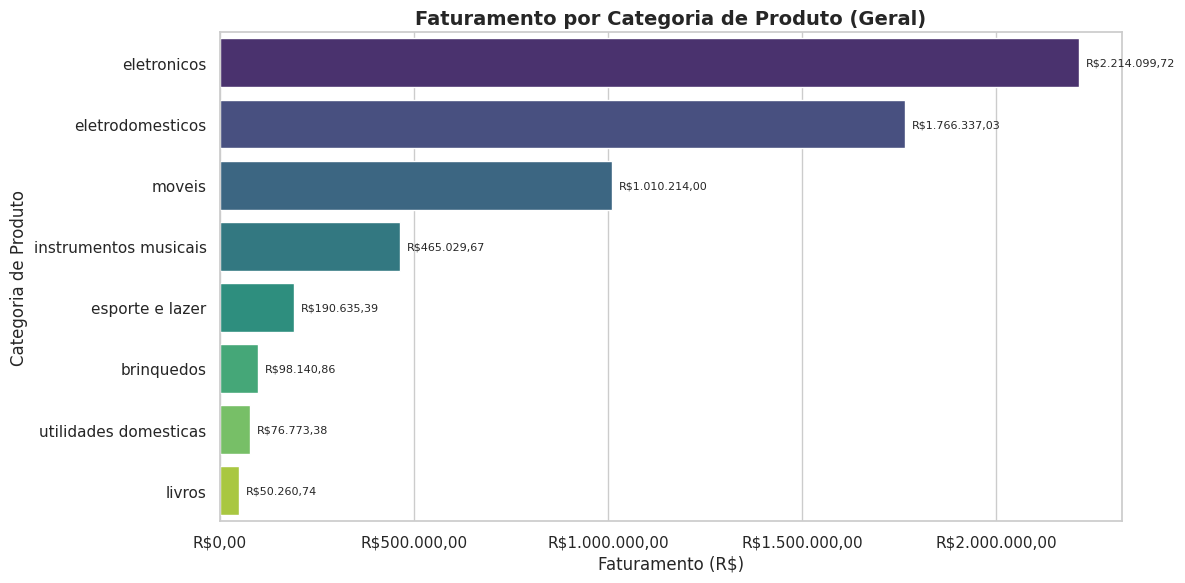

In [40]:
# Função para formatar como R$
def formatar_reais(valor, pos=None):
    return f"R${valor:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=vendas_categoria_geral,
    x="Faturamento",
    y="Categoria do Produto",
    palette="viridis"
)

# Título e rótulos
plt.title("Faturamento por Categoria de Produto (Geral)", fontsize=14, fontweight="bold")
plt.xlabel("Faturamento (R$)")
plt.ylabel("Categoria de Produto")

# Formatando eixo x como moeda
ax.xaxis.set_major_formatter(FuncFormatter(formatar_reais))

# Adicionando os valores nas barras
for p in ax.patches:
    valor = p.get_width()
    if valor > 0:
        ax.annotate(
            formatar_reais(valor),
            (valor, p.get_y() + p.get_height() / 2),
            ha='left', va='center',
            fontsize=8,
            xytext=(5, 0),
            textcoords='offset points'
        )

plt.tight_layout()
plt.show()



### Vendas por Categoria em Cada Loja

In [41]:
vendas_categoria_por_loja = (
    todas_lojas.groupby(["Loja", "Categoria do Produto"])["Faturamento"]
    .sum()
    .reset_index()
)


<ipython-input-42-f8edf8a43b13>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
<ipython-input-42-f8edf8a43b13>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-42-f8edf8a43b13>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
<ipython-input-42-f8edf8a43b13>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-42-f8edf8a43b13>:29: FutureWarning: 

P

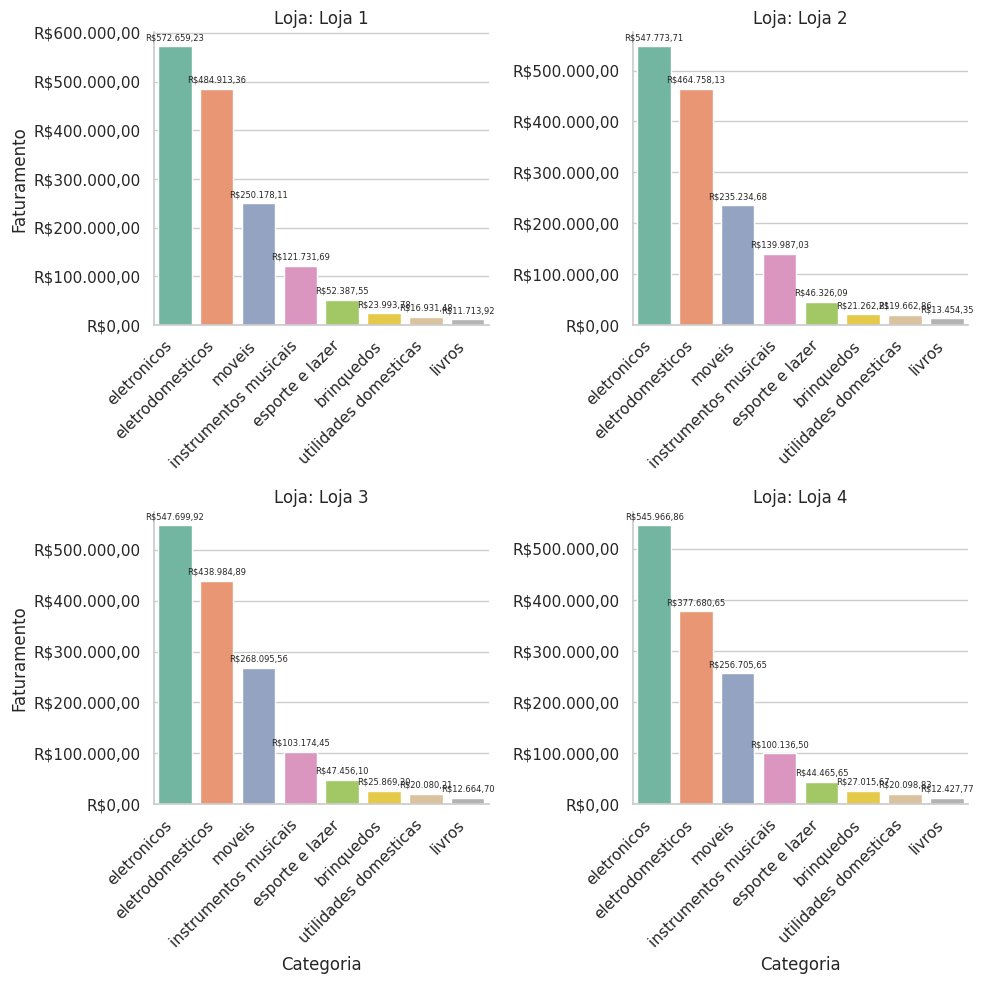

In [42]:
from matplotlib.ticker import FuncFormatter

# Função para uso com FuncFormatter (precisa de dois argumentos: x e pos)
def formatar_reais_tick(x, pos):
    return f"R${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Função para uso direto nas anotações (apenas um argumento)
def formatar_reais(valor):
    return f"R${valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Ordenar os dados por loja e faturamento
vendas_categoria_por_loja = vendas_categoria_por_loja.sort_values(
    by=["Loja", "Faturamento"], ascending=[True, False]
)

# Criar FacetGrid com um gráfico por loja
g = sns.FacetGrid(
    vendas_categoria_por_loja,
    col="Loja",
    col_wrap=2,
    height=5,
    sharex=False,
    sharey=False
)

# Função para desenhar o gráfico de barras com anotações
def plotar_barras(data, **kwargs):
    ax = plt.gca()
    bars = sns.barplot(
        data=data,
        x="Categoria do Produto",
        y="Faturamento",
        palette="Set2",
        ax=ax
    )

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Formatar eixo Y como valor monetário
    ax.yaxis.set_major_formatter(FuncFormatter(formatar_reais_tick))

    # Adicionar valores acima das barras
    for p in bars.patches:
        valor = p.get_height()
        if valor > 0:
            ax.annotate(
                formatar_reais(valor),
                (p.get_x() + p.get_width() / 2., valor),
                ha='center', va='bottom',
                fontsize=6,
                xytext=(0, 3),
                textcoords='offset points'
            )

# Aplicar a função em cada gráfico da FacetGrid
g.map_dataframe(plotar_barras)

# Ajustes finais
g.set_titles("Loja: {col_name}")
g.set_axis_labels("Categoria", "Faturamento")
plt.tight_layout()
plt.show()


### Faturamento por Estado ou cidade

In [43]:
vendas_por_local = todas_lojas.groupby("Local da compra")["Faturamento"].sum().reset_index()
vendas_por_local = vendas_por_local.sort_values(by="Faturamento", ascending=False)

<ipython-input-44-dd3715a2f8a6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=vendas_por_local, x="Faturamento", y="Local da compra", palette="magma")


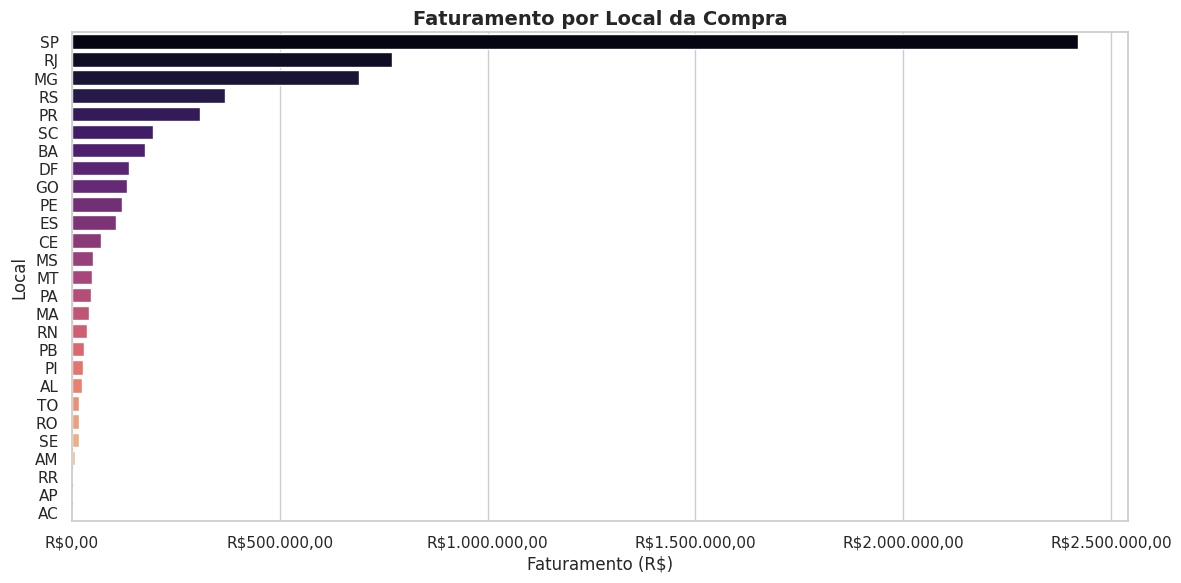

In [44]:
from matplotlib.ticker import FuncFormatter

# Função para uso com FuncFormatter (precisa de x e pos)
def formatar_reais_tick(x, pos):
    return f"R${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Agora use a função correta no gráfico:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=vendas_por_local, x="Faturamento", y="Local da compra", palette="magma")

# Use a função com 2 parâmetros aqui
ax.xaxis.set_major_formatter(FuncFormatter(formatar_reais_tick))

plt.title("Faturamento por Local da Compra", fontsize=14, fontweight="bold")
plt.xlabel("Faturamento (R$)")
plt.ylabel("Local")
plt.tight_layout()
plt.show()


In [45]:
todas_lojas

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja,Ano,Faturamento,Mês
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1,2021,219.08,1
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1,2022,256.35,5
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1,2021,279.51,3
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1,2022,1009.99,5
4,Cadeira de escritório,moveis,446.99,26.964689,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1,2020,446.99,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de jantar,moveis,303.60,16.852799,2020-02-12,Camila Ribeiro,RJ,5,cartao_credito,1,-22.25,-42.66,Loja 4,2020,303.60,2
9431,Cadeira de escritório,moveis,456.02,24.812798,2022-05-17,Felipe Santos,PE,5,cartao_credito,3,-8.38,-37.86,Loja 4,2022,456.02,5
9432,Copo térmico,esporte e lazer,48.99,3.139675,2022-05-03,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79,Loja 4,2022,48.99,5
9433,Jogo de panelas,utilidades domesticas,202.45,11.062979,2020-06-15,Bianca Santos,PR,5,cartao_credito,1,-24.89,-51.55,Loja 4,2020,202.45,6


In [46]:
# Contar quantas lojas únicas estão presentes em cada estado

lojas_por_estado = todas_lojas.groupby("Local da compra")["Loja"].nunique().reset_index()
lojas_por_estado.columns = ["Local da compra", "Quantidade de Lojas"]

lojas_por_estado

,Local da compra,Quantidade de Lojas
0,AC,3
1,AL,4
2,AM,4
3,AP,3
4,BA,4
5,CE,4
6,DF,4
7,ES,4
8,GO,4
9,MA,4


In [47]:
# Agrupar por Estado e Loja:

# Agrupamento por Estado e Loja
agrupamento = todas_lojas[["Local da compra", "Loja"]].drop_duplicates()


In [48]:
# Criar uma tabela com o número de estados únicos por loja:

estados_por_loja = (
    todas_lojas[["Loja", "Local da compra"]]
    .drop_duplicates()
    .groupby("Loja")["Local da compra"]
    .nunique()
    .reset_index()

)

estados_por_loja

,Loja,Local da compra
0,Loja 1,26
1,Loja 2,26
2,Loja 3,27
3,Loja 4,25


<ipython-input-49-5d5d9eabbcb9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=estados_por_loja, x="Loja", y="Local da compra", palette="viridis")


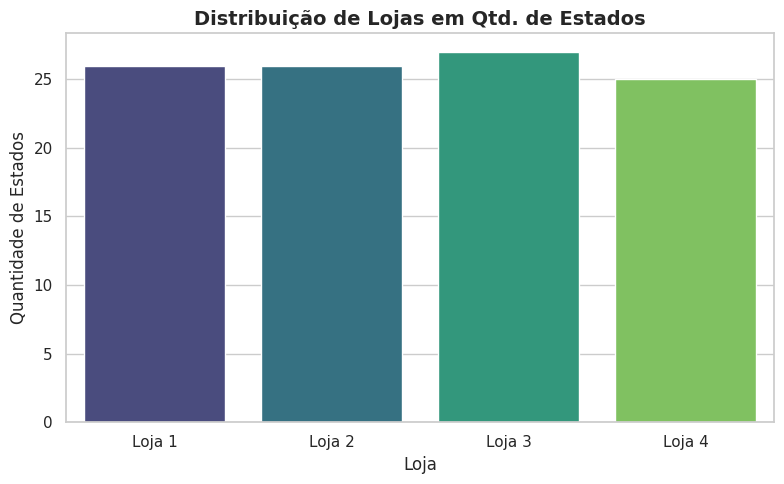

In [49]:
# Verificar a distribuição de cada uma das lojas nos estados

plt.figure(figsize=(8, 5))
sns.barplot(data=estados_por_loja, x="Loja", y="Local da compra", palette="viridis")

plt.title("Distribuição de Lojas em Qtd. de Estados", fontsize=14, fontweight="bold")
plt.xlabel("Loja")
plt.ylabel("Quantidade de Estados")
plt.tight_layout()
plt.show()


É possível observar que as 4 lojas estão bem distribuidas em quase todos os estados do Brasil.

## Média de Avaliação das Lojas

Vamos verificar a média de avaliação de cada uma das lojas.

In [50]:
# Agrupar os dados:

avaliacao_media = (
    todas_lojas
    .groupby("Loja")["Avaliação da compra"]
    .mean()
    .reset_index()
    .rename(columns={"Avaliação da compra": "Média de Avaliação"})
)


<ipython-input-51-94eb803543ac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avaliacao_media, x="Loja", y="Média de Avaliação", palette="crest")


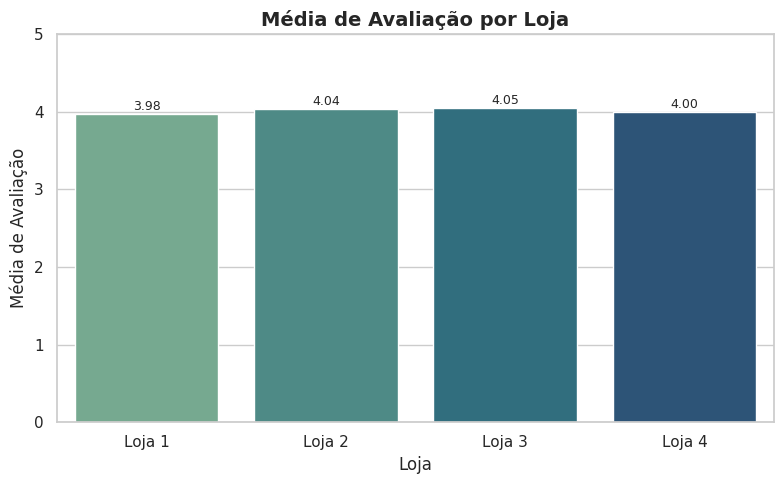

In [51]:
# Plotar o gráfico

plt.figure(figsize=(8, 5))
sns.barplot(data=avaliacao_media, x="Loja", y="Média de Avaliação", palette="crest")

for index, row in avaliacao_media.iterrows():
    plt.text(x=index, y=row["Média de Avaliação"] + 0.05,
             s=f"{row['Média de Avaliação']:.2f}",
             ha='center', fontsize=9)


plt.title("Média de Avaliação por Loja", fontsize=14, fontweight="bold")
plt.ylabel("Média de Avaliação")
plt.ylim(0, 5)  # Ajusta a escala de 0 a 5, já que é comum em avaliações
plt.tight_layout()
plt.show()


É possível observar que entre as lojas parece haver uma variação pequena na média de avaliação. A loja com a menor avaliação é LOJA 1 com média de 3.98. As demais ficam em torno de 4.0 a 4.05. Vamos observar a distribuição das avaliações de cada loja com a ajuda de um boxplot.

<ipython-input-52-9f75c227698f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


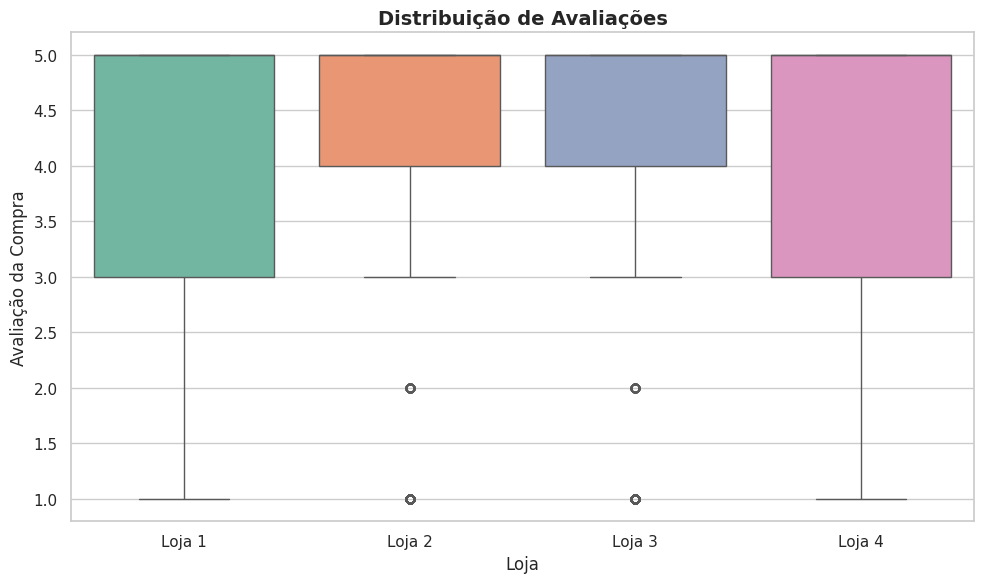

In [52]:
# Boxplot da distribuição de avaliações

# Estilo visual mais limpo
sns.set(style="whitegrid")

# Tamanho da figura
plt.figure(figsize=(10, 6))

# Criando o boxplot
ax = sns.boxplot(
    data=todas_lojas,
    x="Loja",
    y="Avaliação da compra",
    palette="Set2"
)

# Título e eixos
plt.title("Distribuição de Avaliações", fontsize=14, fontweight='bold')
plt.xlabel("Loja")
plt.ylabel("Avaliação da Compra")
plt.tight_layout()
plt.show()

In [53]:
todas_lojas.groupby("Loja")["Avaliação da compra"].describe()

,count,mean,std,min,25%,50%,75%,max
Loja,,,,,,,,
Loja 1,2359.0,3.976685,1.415370,1.0,3.0,5.0,5.0,5.0
Loja 2,2359.0,4.037304,1.356153,1.0,4.0,5.0,5.0,5.0
Loja 3,2359.0,4.048326,1.386426,1.0,4.0,5.0,5.0,5.0
Loja 4,2358.0,3.995759,1.403063,1.0,3.0,5.0,5.0,5.0


A distribuição de notas das avaliações também é semelhante porem as lojas 1 e 4 possuem algumas avaliações bem menores o que nas lojas 2 e 3 é considerado outliers

## Quais os produtos mais e menos vendidos por loja? (faturamento)

### Top 5 produtos mais vendidos

<ipython-input-54-388e33d497d9>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_por_loja = faturamento_produto_loja.groupby("Loja", group_keys=False).apply(
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plo

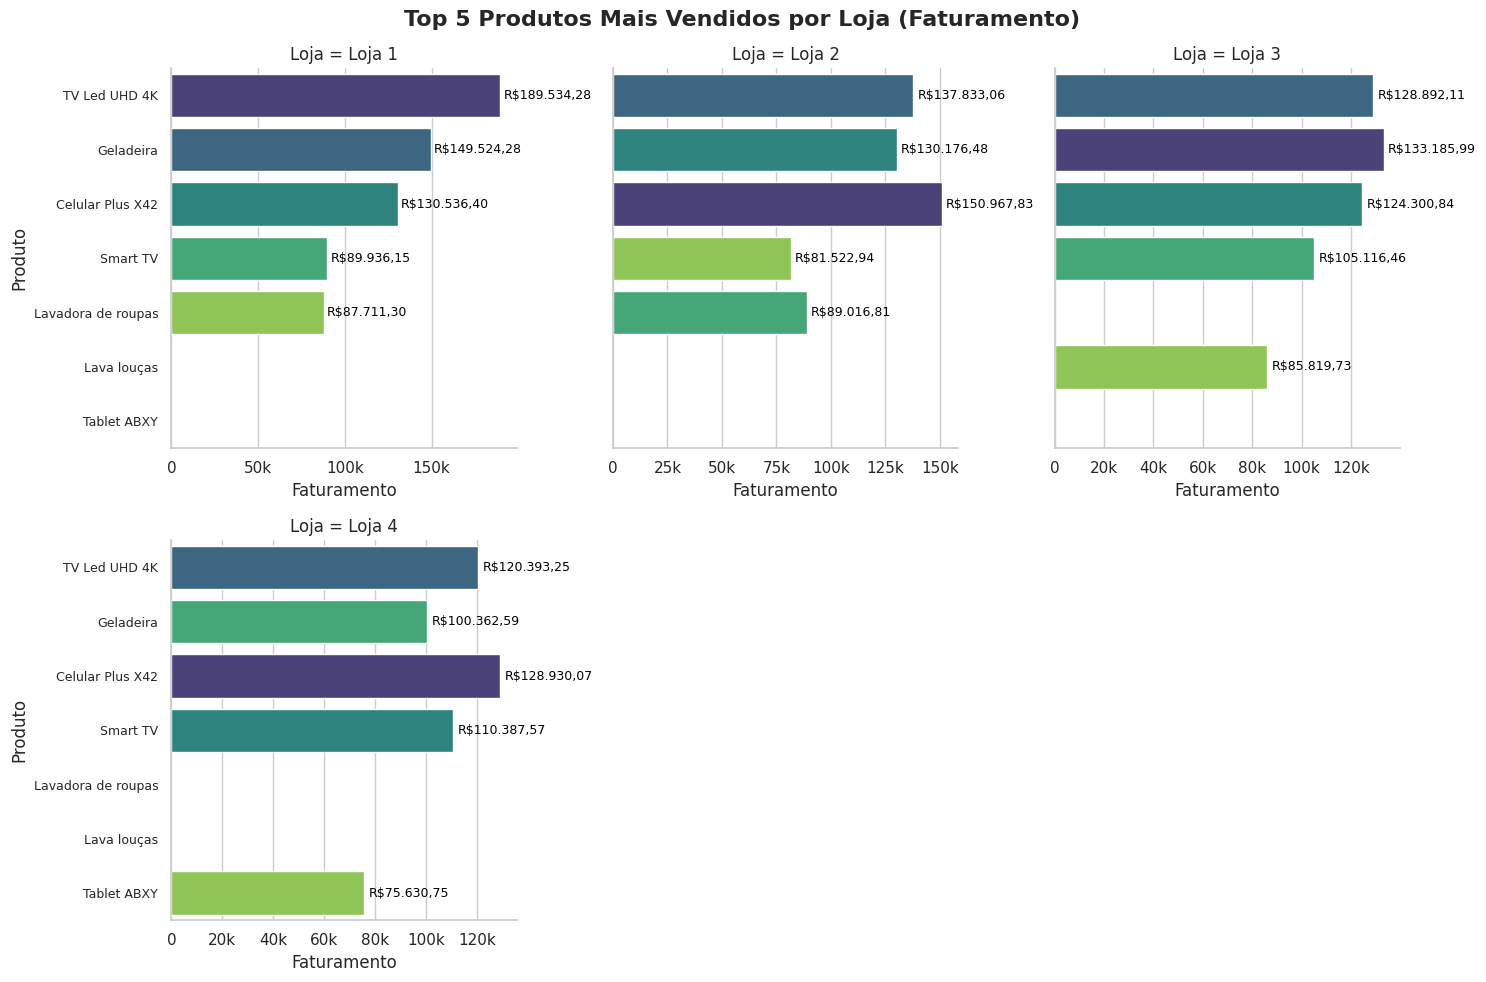

In [54]:
from matplotlib.ticker import FuncFormatter

def formatar_reais(x):
    return f"R${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Formatação simples do eixo X (milhares com 'k')
def formatar_milhar(x, _):
    if x >= 1000:
        return f"{int(x/1000)}k"
    return f"{int(x)}"

# Agrupar e pegar top 5 produtos por loja
faturamento_produto_loja = todas_lojas.groupby(["Loja", "Produto"])["Faturamento"].sum().reset_index()
top5_por_loja = faturamento_produto_loja.groupby("Loja", group_keys=False).apply(
    lambda x: x.nlargest(5, "Faturamento")
).reset_index(drop=True)

# Gráfico
g = sns.FacetGrid(top5_por_loja, col="Loja", col_wrap=3, sharex=False, height=5)
g.map_dataframe(sns.barplot, y="Produto", x="Faturamento", palette="viridis")

# Adicionar valores ao lado das barras
for ax in g.axes.flatten():
    ax.xaxis.set_major_formatter(FuncFormatter(formatar_milhar))
    for bar in ax.patches:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        ax.text(
            width + max(top5_por_loja["Faturamento"]) * 0.01,
            y,
            formatar_reais(width),
            va="center",
            fontsize=9,
            color="black"
        )
    ax.set_xlabel("Faturamento")
    ax.set_ylabel("Produto")
    ax.tick_params(axis='y', labelsize=9)

# Título e layout
g.fig.subplots_adjust(top=0.9, hspace=0.4)
g.fig.suptitle("Top 5 Produtos Mais Vendidos por Loja (Faturamento)", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()







### Top 10 produtos com maior faturamento (geral):

<ipython-input-55-1f5500ab92cc>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_produtos, x="Faturamento", y="Produto", palette="viridis")


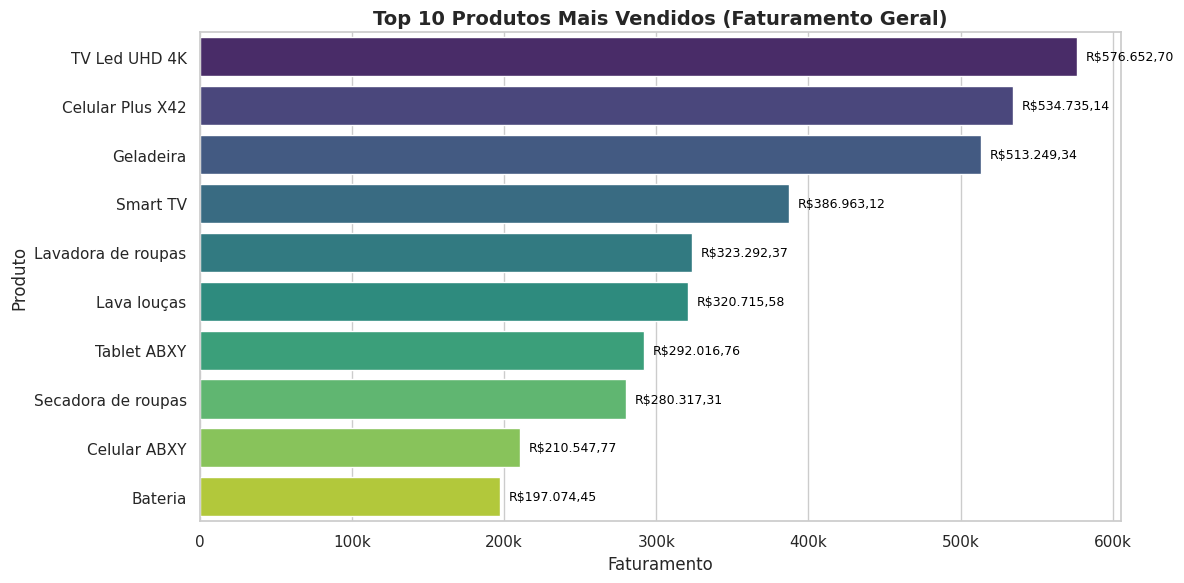

In [55]:
# Função para formatar em reais
def formatar_reais(x):
    return f"R${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Função para simplificar eixo X
def formatar_milhar(x, _):
    if x >= 1000:
        return f"{int(x/1000)}k"
    return f"{int(x)}"

# Agrupar por Produto e somar Faturamento
top10_produtos = (
    todas_lojas.groupby("Produto")["Faturamento"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top10_produtos, x="Faturamento", y="Produto", palette="viridis")

# Remover R$ do eixo e usar formato mais compacto
ax.xaxis.set_major_formatter(FuncFormatter(formatar_milhar))

# Adicionar rótulos ao lado das barras
for bar in ax.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(
        width + max(top10_produtos["Faturamento"]) * 0.01,
        y,
        formatar_reais(width),
        va="center",
        fontsize=9,
        color="black"
    )

# Títulos e eixos
plt.title("Top 10 Produtos Mais Vendidos (Faturamento Geral)", fontsize=14, fontweight="bold")
plt.xlabel("Faturamento")
plt.ylabel("Produto")
plt.tight_layout()
plt.show()


### Top 5 produtos menos vendidos

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

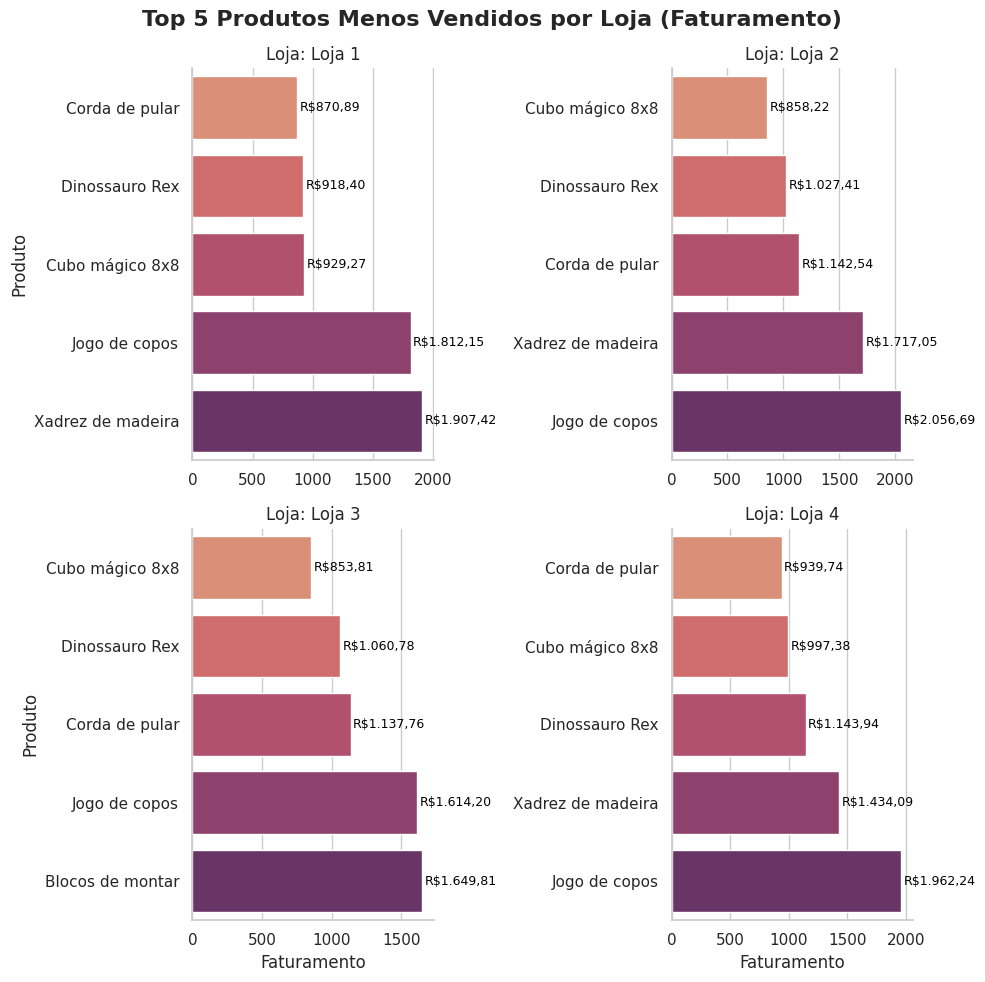

In [56]:
## Função para formatar em reais nos rótulos

def formatar_reais(valor):
    return f"R${valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

# Preparar dados: menor faturamento por loja
produtos_menos_vendidos = (
    todas_lojas.groupby(["Loja", "Produto"])["Faturamento"]
    .sum()
    .reset_index()
)

# Selecionar os 5 produtos de menor faturamento por loja
produtos_menos_vendidos = (
    produtos_menos_vendidos.sort_values(["Loja", "Faturamento"])
    .groupby("Loja")
    .head(5)
)

# Plotar os gráficos com FacetGrid
g = sns.FacetGrid(
    produtos_menos_vendidos,
    col="Loja",
    col_wrap=2,
    height=5,
    sharex=False,
    sharey=False
)

g.map_dataframe(
    sns.barplot,
    x="Faturamento",
    y="Produto",
    palette="flare"
)

# Adicionar rótulos ao lado das barras
for ax, (_, sub_df) in zip(g.axes.flat, produtos_menos_vendidos.groupby("Loja")):
    for bar in ax.patches:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        ax.text(
            width + max(sub_df["Faturamento"]) * 0.01,
            y,
            formatar_reais(width),
            va="center",
            fontsize=9,
            color="black"
        )
    # Remover formatação do eixo X
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

# Ajustar o layout geral
g.set_titles(col_template="Loja: {col_name}")
g.set_axis_labels("Faturamento", "Produto")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Top 5 Produtos Menos Vendidos por Loja (Faturamento)", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

### Top 10 produtos com menor faturamento (geral):

<ipython-input-57-c2e9ea33866b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


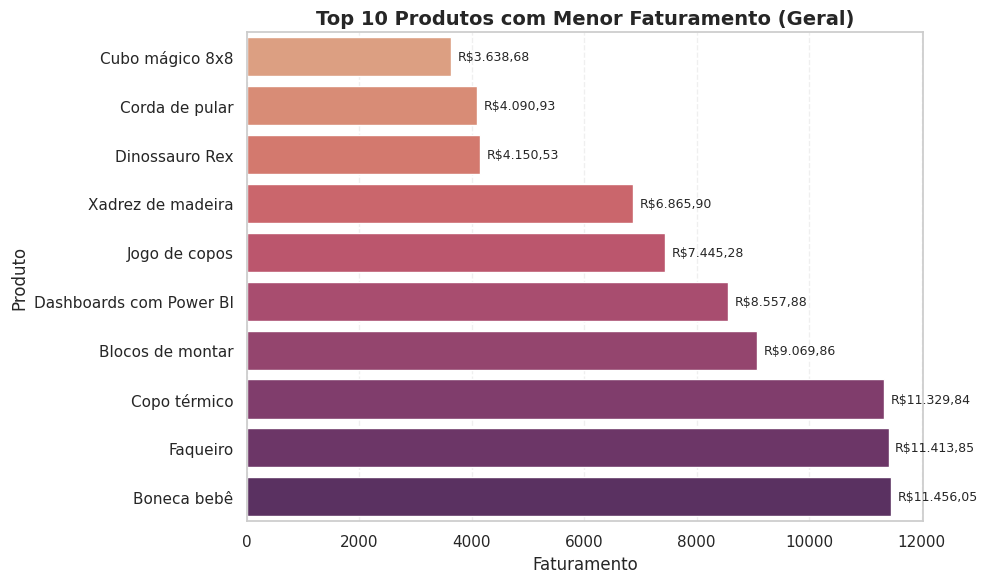

In [57]:
# Agrupar por Produto e somar o faturamento total
produtos_menos_vendidos_geral = (
    todas_lojas.groupby("Produto")["Faturamento"]
    .sum()
    .sort_values()
    .head(10)  # os 10 produtos com menor faturamento
    .reset_index()
)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=produtos_menos_vendidos_geral,
    x="Faturamento",
    y="Produto",
    palette="flare"
)

# Adicionar rótulos ao lado das barras
for i, bar in enumerate(ax.patches):
    valor = bar.get_width()
    ax.text(
        valor + produtos_menos_vendidos_geral["Faturamento"].max() * 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"R${valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."),
        va="center",
        fontsize=9
    )

# Ajustes do gráfico
plt.title("Top 10 Produtos com Menor Faturamento (Geral)", fontsize=14, fontweight="bold")
plt.xlabel("Faturamento")
plt.ylabel("Produto")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


## Frete médio por loja

In [58]:
# Agrupar por loja e calcular a média do frete
tabela_frete_medio = (
    todas_lojas.groupby("Loja")["Frete"]
    .mean()
    .reset_index()
    .rename(columns={"Frete": "Frete Médio (R$)"})
)

# Arredondar os valores para 2 casas decimais
tabela_frete_medio["Frete Médio (R$)"] = tabela_frete_medio["Frete Médio (R$)"].round(2)

# Exibir a tabela
tabela_frete_medio


,Loja,Frete Médio (R$)
0,Loja 1,34.69
1,Loja 2,33.62
2,Loja 3,33.07
3,Loja 4,31.28


<ipython-input-59-65d33206ac8f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


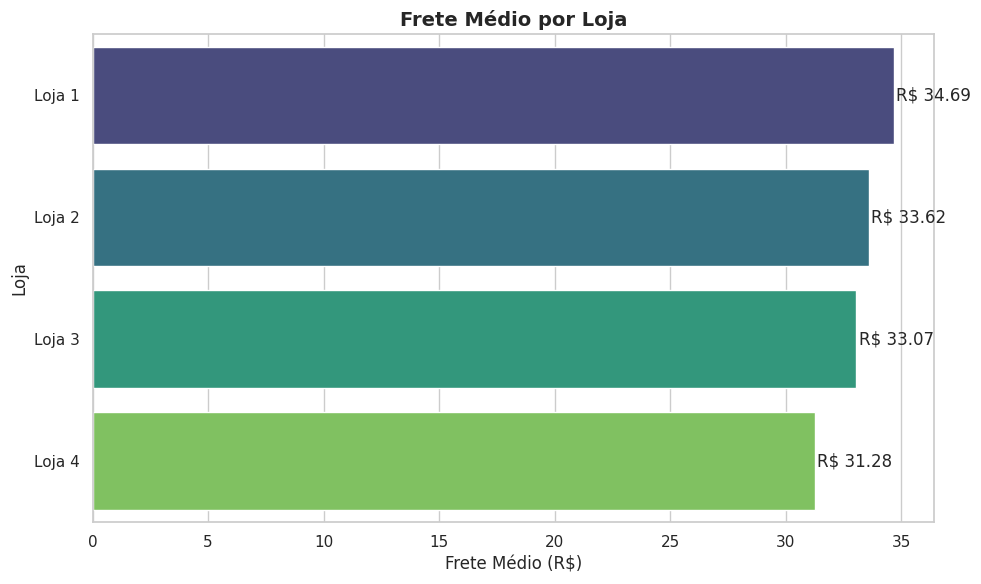

In [59]:

# Ordenar a tabela para melhorar a visualização do gráfico
tabela_ordenada = tabela_frete_medio.sort_values("Frete Médio (R$)", ascending=False)

# Criar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=tabela_ordenada,
    x="Frete Médio (R$)",
    y="Loja",
    palette="viridis"
)

# Adicionar os valores ao lado das barras
for i, valor in enumerate(tabela_ordenada["Frete Médio (R$)"]):
    ax.text(valor + 0.1, i, f"R$ {valor:.2f}", va='center')

plt.title("Frete Médio por Loja", fontsize=14, fontweight="bold")
plt.xlabel("Frete Médio (R$)")
plt.ylabel("Loja")
plt.tight_layout()
plt.show()

## Frete Médio por Loja e Categoria de Produto

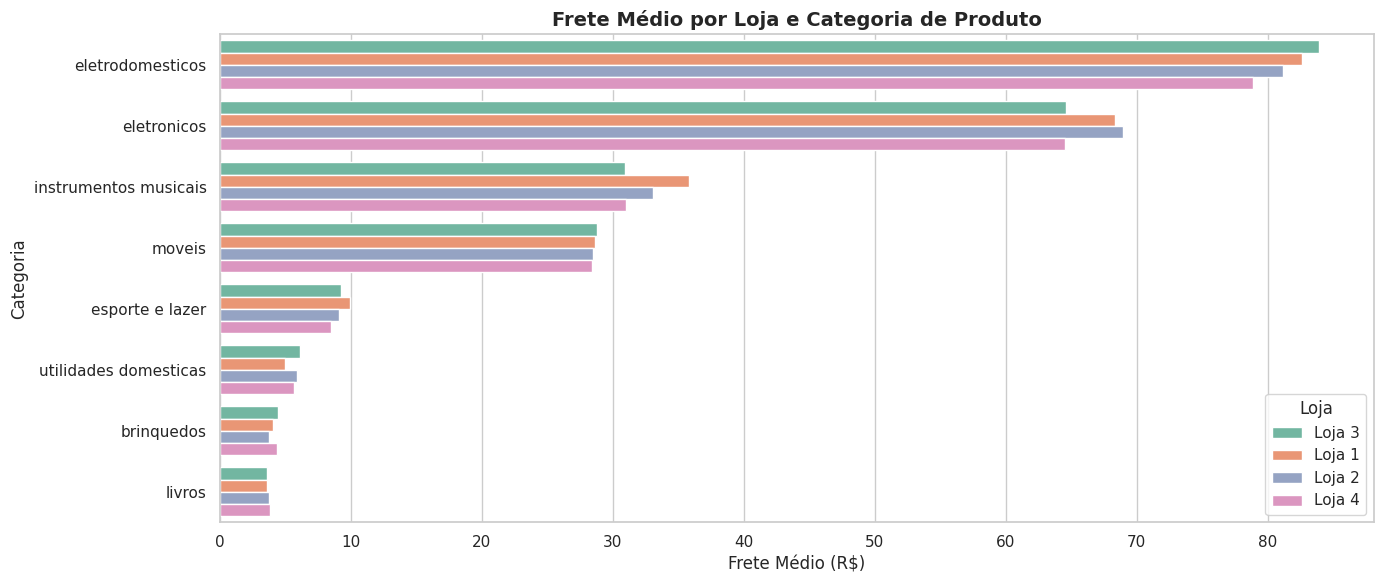

In [60]:
# Calcular o frete médio por Loja e Categoria
frete_medio = (
    todas_lojas.groupby(["Loja", "Categoria do Produto"])["Frete"]
    .mean()
    .reset_index()
    .sort_values(by="Frete", ascending=False)
)

# Plotar o gráfico
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=frete_medio,
    x="Frete",
    y="Categoria do Produto",
    hue="Loja",
    palette="Set2"
)

# Adicionar título e rótulos
plt.title("Frete Médio por Loja e Categoria de Produto", fontsize=14, fontweight="bold")
plt.xlabel("Frete Médio (R$)")
plt.ylabel("Categoria")
plt.legend(title="Loja")
plt.tight_layout()
plt.show()


### Tabela: Frete Médio por Loja e Categoria de Produto

In [61]:
# Calcular frete médio por loja e categoria
frete_medio_tabela = (
    todas_lojas.groupby(["Loja", "Categoria do Produto"])["Frete"]
    .mean()
    .reset_index()
    .rename(columns={"Frete": "Frete Médio (R$)"}).round(2)
    .sort_values(by=["Loja", "Frete Médio (R$)"], ascending=[True, False])
)

# Exibir a tabela
display(frete_medio_tabela)


,Loja,Categoria do Produto,Frete Médio (R$)
1,Loja 1,eletrodomesticos,82.58
2,Loja 1,eletronicos,68.35
4,Loja 1,instrumentos musicais,35.78
6,Loja 1,moveis,28.66
3,Loja 1,esporte e lazer,9.96
7,Loja 1,utilidades domesticas,5.02
0,Loja 1,brinquedos,4.03
5,Loja 1,livros,3.60
9,Loja 2,eletrodomesticos,81.12
10,Loja 2,eletronicos,68.92


### Percentual do Frete em relação ao Valor do Pedido

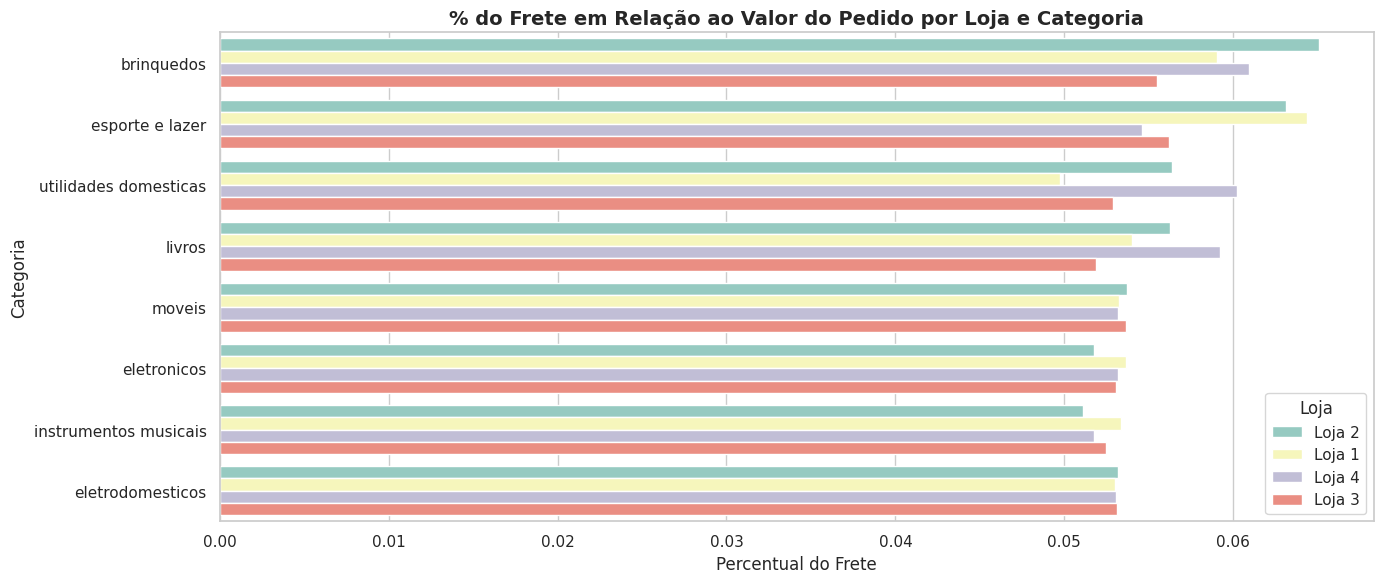

In [62]:
# Criar coluna com o percentual do frete sobre o pedido
todas_lojas["% Frete"] = todas_lojas["Frete"] / todas_lojas["Faturamento"]

# Calcular o percentual médio agrupado por Loja e Categoria
percentual_frete = (
    todas_lojas.groupby(["Loja", "Categoria do Produto"])["% Frete"]
    .mean()
    .reset_index()
    .sort_values(by="% Frete", ascending=False)
)

# Plotar gráfico
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=percentual_frete,
    x="% Frete",
    y="Categoria do Produto",
    hue="Loja",
    palette="Set3"
)

# Adicionar título e rótulos
plt.title("% do Frete em Relação ao Valor do Pedido por Loja e Categoria", fontsize=14, fontweight="bold")
plt.xlabel("Percentual do Frete")
plt.ylabel("Categoria")
plt.legend(title="Loja")
plt.tight_layout()
plt.show()


### Tabela: Percentual do Frete em relação ao Faturamento por Loja e Categoria

In [63]:
# Agrupar e calcular os valores médios
tabela_agrupada = (
    todas_lojas.groupby(["Loja", "Categoria do Produto"])
    .agg({
        "Frete": "mean",
        "Preço": "mean"
    })
    .reset_index()
)

# Calcular a % do frete sobre o preço
tabela_agrupada["% Frete sobre o Preço"] = tabela_agrupada["Frete"] / tabela_agrupada["Preço"]

# Renomear colunas para exibição
tabela_agrupada.rename(columns={
    "Frete": "Frete Médio (R$)",
    "Preço": "Preço Médio (R$)"
}, inplace=True)

# Opcional: ordenar a tabela
tabela_agrupada = tabela_agrupada.sort_values(by=["Loja", "Categoria do Produto"])

# Arredondar colunas
tabela_agrupada["Frete Médio (R$)"] = tabela_agrupada["Frete Médio (R$)"].round(2)
tabela_agrupada["Preço Médio (R$)"] = tabela_agrupada["Preço Médio (R$)"].round(2)
tabela_agrupada["% Frete sobre o Preço"] = (tabela_agrupada["% Frete sobre o Preço"] * 100).round(2)


# Exibir
tabela_agrupada



,Loja,Categoria do Produto,Frete Médio (R$),Preço Médio (R$),% Frete sobre o Preço
0,Loja 1,brinquedos,4.03,74.05,5.44
1,Loja 1,eletrodomesticos,82.58,1554.21,5.31
2,Loja 1,eletronicos,68.35,1278.26,5.35
3,Loja 1,esporte e lazer,9.96,184.46,5.40
4,Loja 1,instrumentos musicais,35.78,668.86,5.35
5,Loja 1,livros,3.60,67.71,5.31
6,Loja 1,moveis,28.66,538.02,5.33
7,Loja 1,utilidades domesticas,5.02,99.01,5.07
8,Loja 2,brinquedos,3.78,67.93,5.57
9,Loja 2,eletrodomesticos,81.12,1523.80,5.32


### Análise de Ticket médio de cada empresa

In [64]:
# Agrupando os dados por Loja
tabela_ticket_medio = (
    todas_lojas.groupby("Loja")
    .agg({
        "Faturamento": "sum",
        "Produto": "count"  # contando o número de vendas
    })
    .reset_index()
)

# Calculando o ticket médio
tabela_ticket_medio["Ticket Médio (R$)"] = tabela_ticket_medio["Faturamento"] / tabela_ticket_medio["Produto"]

# Renomeando colunas para clareza
tabela_ticket_medio.rename(columns={
    "Faturamento": "Faturamento Total (R$)",
    "Produto": "Quantidade de Vendas"
}, inplace=True)

# Arredondando os valores
tabela_ticket_medio["Faturamento Total (R$)"] = tabela_ticket_medio["Faturamento Total (R$)"].round(2)
tabela_ticket_medio["Ticket Médio (R$)"] = tabela_ticket_medio["Ticket Médio (R$)"].round(2)

# Exibindo a tabela
tabela_ticket_medio


,Loja,Faturamento Total (R$),Quantidade de Vendas,Ticket Médio (R$)
0,Loja 1,1534509.12,2359,650.49
1,Loja 2,1488459.06,2359,630.97
2,Loja 3,1464025.03,2359,620.61
3,Loja 4,1384497.58,2358,587.15


# Conclusão e Recomendações
---

## 1. Faturamento e Ticket médio

As lojas possuem quantidades de produtos vendidos iguais em praticamente todas as lojas. O faturamento diferencia-se por pouco, sendo o maior faturamento e ticket médio da loja 1. Neste quadro, a loja com o pior faturamento e menor ticket médio é a loja 4.

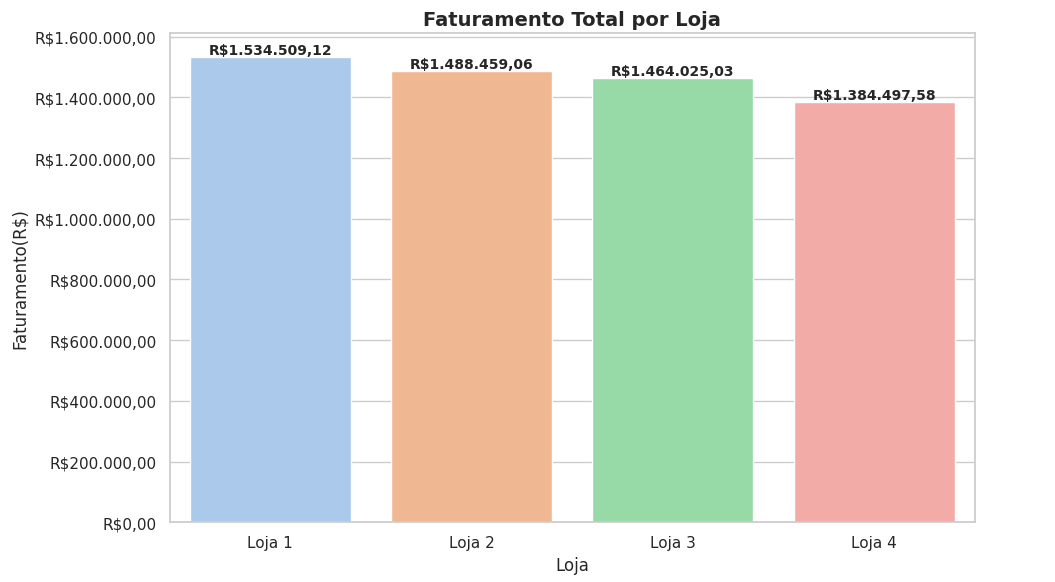




---

## 2. Vendas por categoria  

* As categorias de eletronicos, eletrodomesticos e móveis são as categorias que trazem o maior faturamento geral (todas as lojas).

* Dentre as lojas, a loja 1 possui o maior faturamento nessas categorias.

* A Loja 4 de novo, apresenta o pior desempenho em comparação as demais lojas



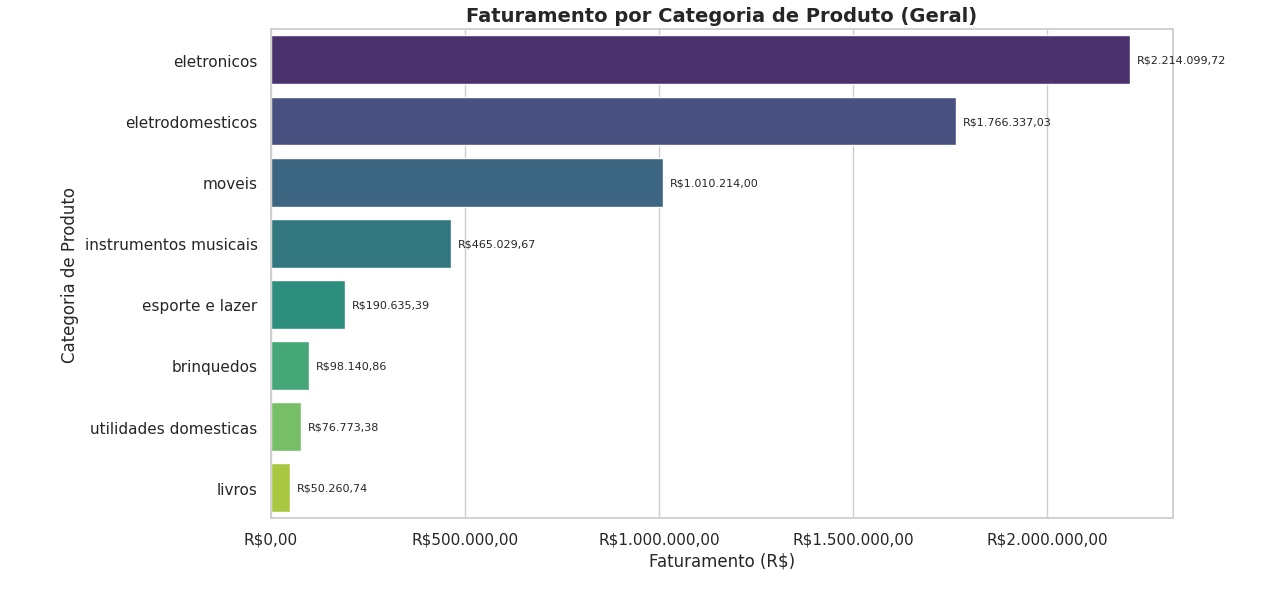

---



## 2.1. Faturamento por loja e categoria

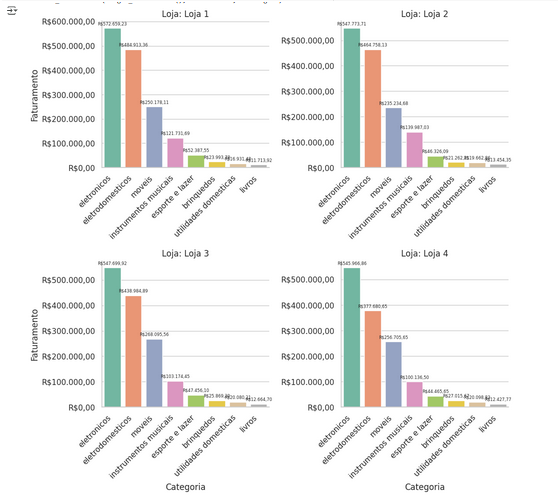

---

## 3. Produtos mais vendidos (faturamento)

* Visão por tipo de produto para mostrar que de todas as lojas, a 4 possui o menor faturamento

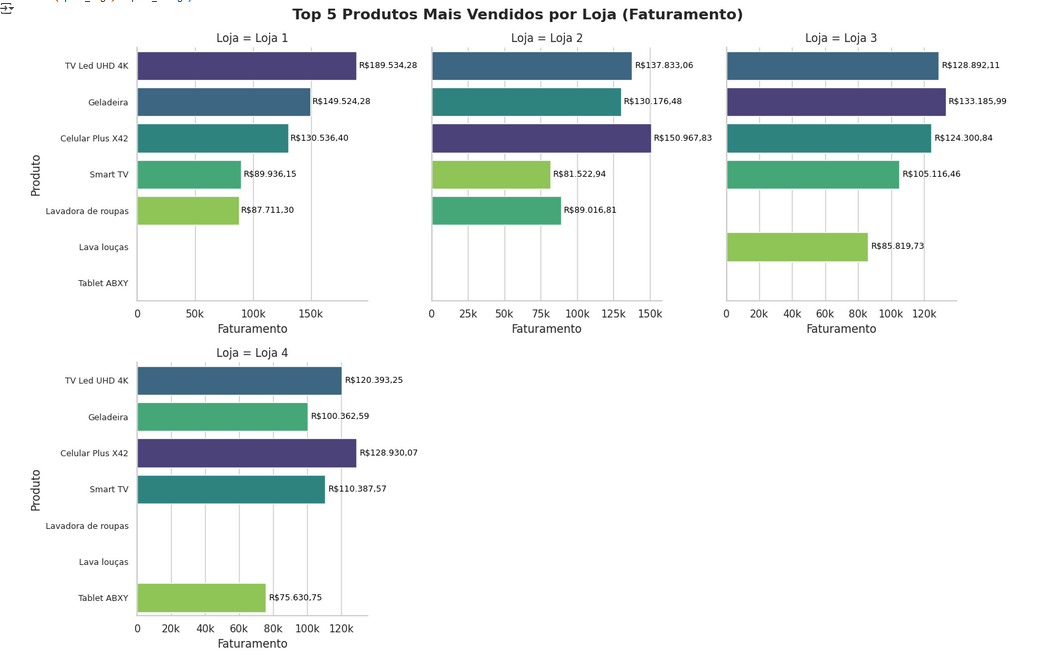

---

## 4. Análise frete médio por loja

* A loja 4 possui o menor frete médio apesar de apresentar o menor faturamento geral  
* A porcentagem de frete por categoria de produto em cada loja é em torno de 5.07% a 5.8% a depender da categoria.


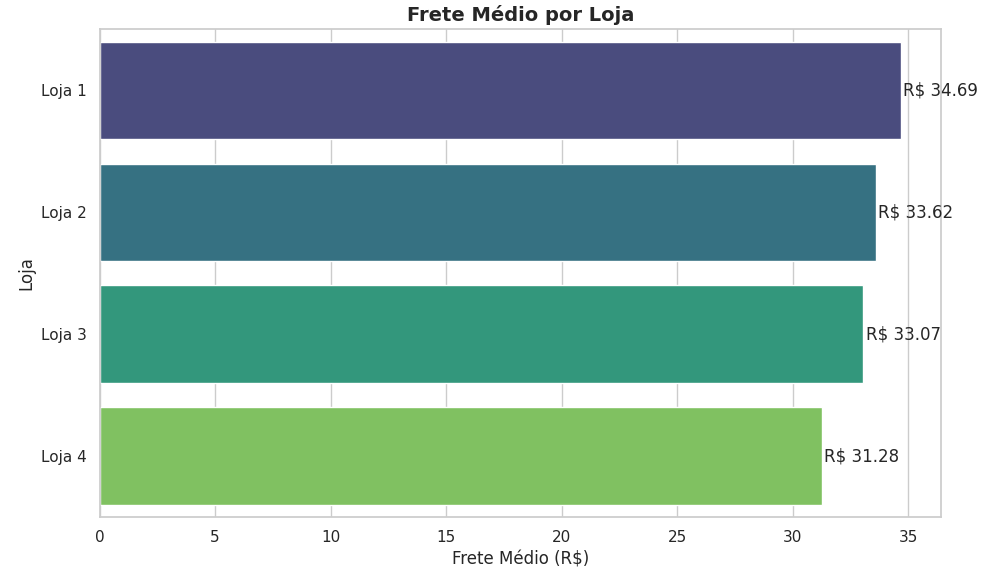

---



## 5. Avaliação Média das lojas

* A loja 1 possui a menor avaliação apesar de ser a loja com o maior faturamento. Seria necessário mais dados para investigar melhor o motivo que poderia ser por problemas com o produto, entrega ou atendimento.

* Da mesma forma, a loja mais bem avaliada foi a 3.  

* As lojas 2 e 3 possuem distribuições de avaliações um pouco mais altas que as lojas 1 e 4 o que pode sugerir que nas lojas 2 e 3 os bons atendimentos são mais recorrentes e atendimentos ruins (que poderiam acarretar avaliações mais baixas pelos clientes) são mais raras(outliers), mas para ter certeza deste fato seria necessário fazer uma análise mais detalhada e dispor de mais dados.


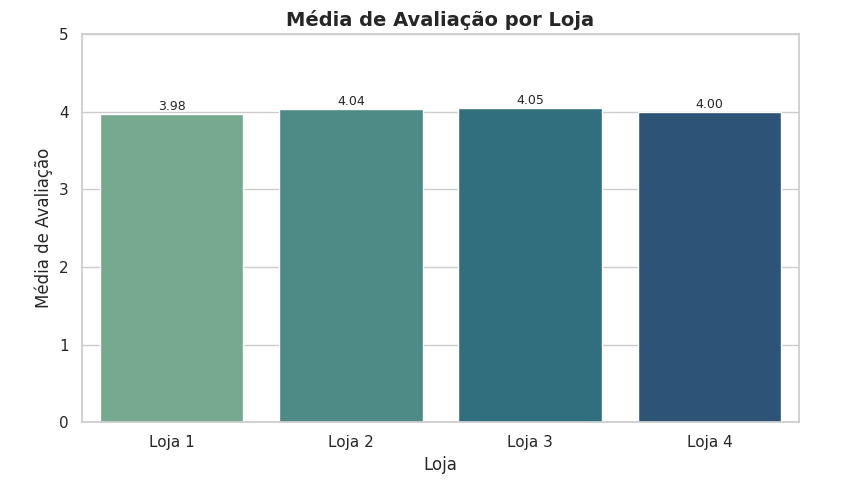

---
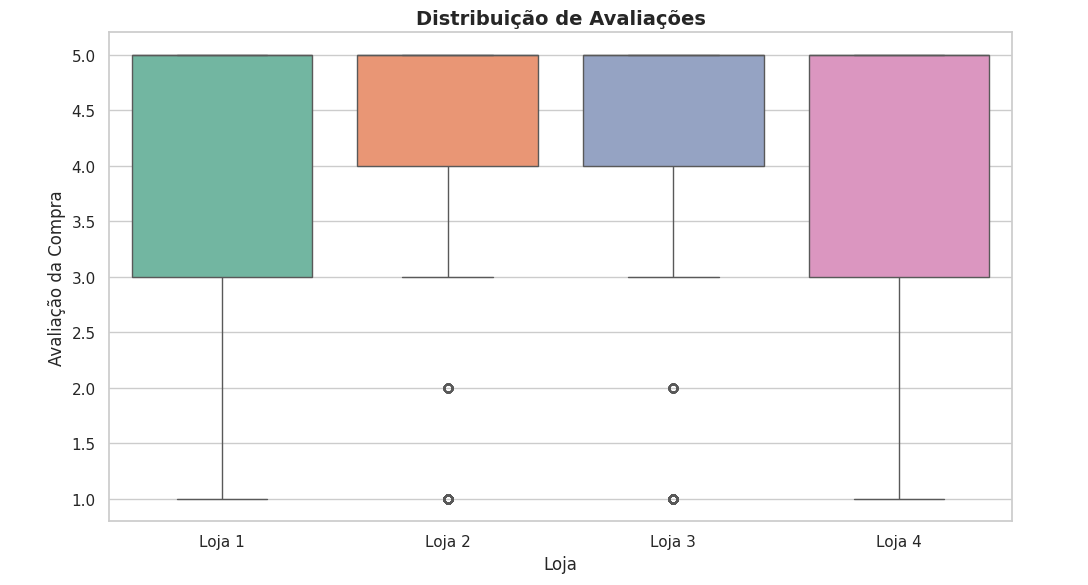


---


## Conclusão

Esta análise foi realizada elencando alguns aspectos considerados importantes como análise do faturamentos geral, por categoria e por produto, avaliação das lojas e outros aspectos que foram analisados no EDA deste projeto a fim de traçar um perfil das lojas e auxiliar a tomada de decisão.

Nos aspectos mais relevantes como faturamento, a loja 4 foi a que apresentou o menor desempenho geral e por isso como recomendação estratégica a venda ou a estruturação desta loja.